# House Prices - Advanced Regression Techniques

In this Exercise, we explore the Algorithms of machine learning in predicting house prices. Specifically, we will be constructing a regression models. We attempt to improve model performance by implementing kernels for hyper-dimensional feature mapping. We also go over statistical techniques commonly used in processing data for regression
estimation. 

In [97]:
import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

2024-03-21 23:22:03.441776: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [98]:
df_train_copy = pd.read_csv('/Users/narasimharaovaddi/Downloads/Study/Python/Python Workspace/Kaggle/house-prices-advanced-regression-techniques/train.csv')
df_train = df_train_copy
df_train.head(10)

Full train dataset shape is (1460, 81)


In [99]:
df_train.describe()

In [100]:
# lets do some statistcal Analyis
df_train.describe(exclude=[np.object_],percentiles=[0.5]).transpose()

/var/folders/d8/wgf8s835403cv249cbx11k700000gn/T/ipykernel_50333/886804650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

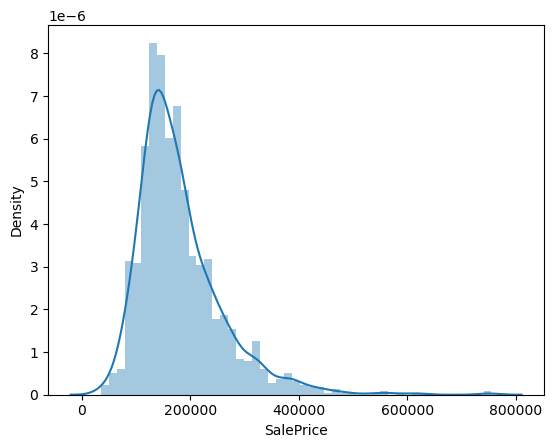

In [52]:
sns.distplot(df_train['SalePrice'])

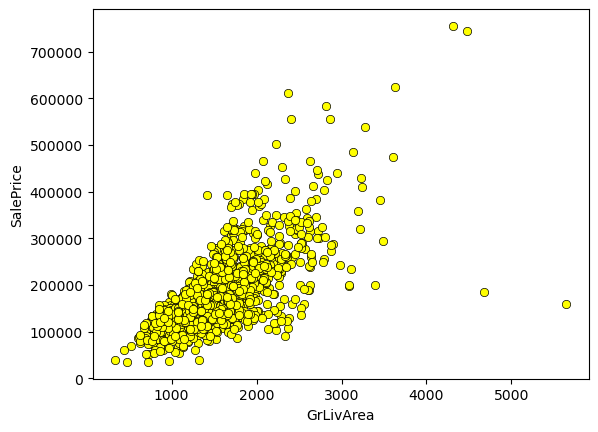

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], 
            color="yellow", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

(1460, 81)
(1445, 81)


/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: N

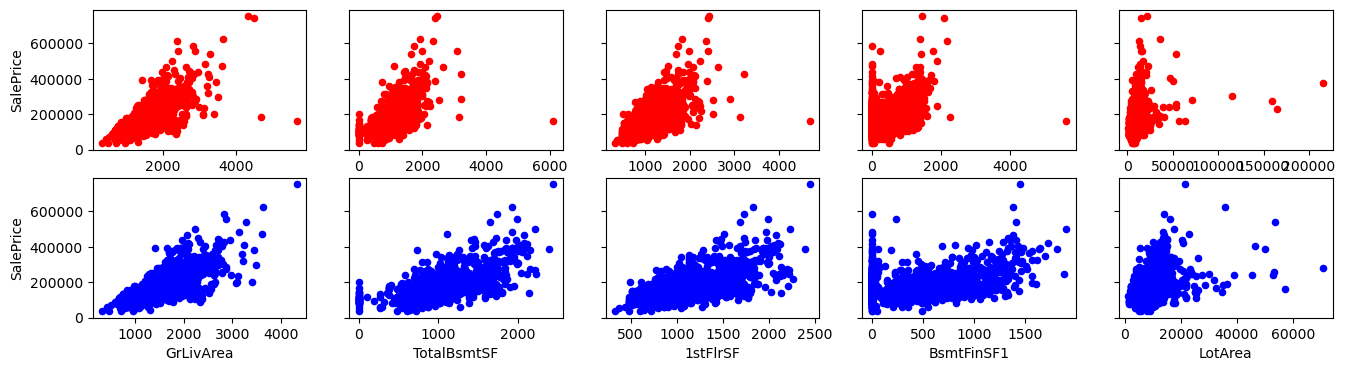

In [54]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

# delete outliers
print(df_train.shape)
df_train = df_train[df_train['GrLivArea'] < 4500]
df_train = df_train[df_train['LotArea'] < 100000]
df_train = df_train[df_train['TotalBsmtSF'] < 3000]
df_train = df_train[df_train['1stFlrSF'] < 2500]
df_train = df_train[df_train['BsmtFinSF1'] < 2000]

print(df_train.shape)

for i, c in zip(range(5,10), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')

In [55]:
#Data cleaning
#Handinling Ordinal and nominal data

#Ordinal categorical fields
column_names = ['Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'ExterQual',
                    'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond',
                    'PavedDrive']

In [56]:
df_train[column_names] = df_train[column_names].fillna(0)

In [57]:
for name in column_names:
    total_records = len(df_train[name].unique())
    unique_records = df_train[name].unique().tolist()
    #print(name, '-', unique_records)
    dict={}
    if total_records > 0:
        for i in range(0, total_records):
            if unique_records[i] == 0:
                dict[unique_records[i]] = 0
            else:
                dict[unique_records[i]] = i + 1
        print(name, '-', dict)
        df_train[name] = df_train[name].map(dict)
        #print(df_train[name].unique())


Street - {'Pave': 1, 'Grvl': 2}
Alley - {0: 0, 'Grvl': 2, 'Pave': 3}
LotShape - {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
Utilities - {'AllPub': 1, 'NoSeWa': 2}
LandSlope - {'Gtl': 1, 'Mod': 2, 'Sev': 3}
ExterQual - {'Gd': 1, 'TA': 2, 'Ex': 3, 'Fa': 4}
ExterCond - {'TA': 1, 'Gd': 2, 'Fa': 3, 'Po': 4, 'Ex': 5}
BsmtQual - {'Gd': 1, 'TA': 2, 'Ex': 3, 0: 0, 'Fa': 5}
BsmtCond - {'TA': 1, 'Gd': 2, 0: 0, 'Fa': 4, 'Po': 5}
BsmtExposure - {'No': 1, 'Gd': 2, 'Mn': 3, 'Av': 4, 0: 0}
BsmtFinType1 - {'GLQ': 1, 'ALQ': 2, 'Unf': 3, 'Rec': 4, 'BLQ': 5, 0: 0, 'LwQ': 7}
BsmtFinType2 - {'Unf': 1, 'BLQ': 2, 0: 0, 'ALQ': 4, 'Rec': 5, 'LwQ': 6, 'GLQ': 7}
HeatingQC - {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5}
KitchenQual - {'Gd': 1, 'TA': 2, 'Ex': 3, 'Fa': 4}
Functional - {'Typ': 1, 'Min1': 2, 'Maj1': 3, 'Min2': 4, 'Mod': 5, 'Maj2': 6, 'Sev': 7}
FireplaceQu - {0: 0, 'TA': 2, 'Gd': 3, 'Fa': 4, 'Ex': 5, 'Po': 6}
GarageQual - {'TA': 1, 'Fa': 2, 'Gd': 3, 0: 0, 'Ex': 5, 'Po': 6}
GarageCond - {'TA': 1, 'Fa': 2, 

In [58]:
#Handling Numeric continuous Data Set
mean_LotFrontage = df_train['LotFrontage'].mean()
df_train['LotFrontage'].fillna(mean_LotFrontage, inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)

In [59]:
#Handling Numeric discrete Data Set
df_train['GarageYrBlt'].fillna(0, inplace=True)

In [36]:
#Handling Nominal categorical Data Set
categorical_columns = df_train.select_dtypes(include=['object']).columns
df_train[categorical_columns] = df_train[categorical_columns].fillna(0).astype(np.str_)

In [61]:
#converting categorical_columns data to numeric using one hot encoding
from sklearn.preprocessing import OneHotEncoder

s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_train[object_cols]))
OH_cols.index = df_train.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df_train.drop(object_cols, axis=1)
df_train = pd.concat([df_final, OH_cols], axis=1)

Categorical variables:
['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  24


/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
df_train.drop(['Id'], inplace=True, axis=1)

In [42]:
def remove_corr_features(df, threshold):
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df = df.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return df

In [63]:
def ML_models(x, X_train, X_test, y_train, y_test):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x,
                                            transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__

    scores = cross_val_score(regr_trans, X, y, cv=5)
    mean_accuracy = scores.mean()

    return (algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2),
            round((mean_squared_log_error(y_test, yhat)), 2), mean_accuracy )


In [87]:
gb_params = {'n_estimators': 10, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2}

from sklearn import svm
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

algo=[GradientBoostingRegressor(),
      lgbm.LGBMRegressor(),
      xg.XGBRFRegressor(),
      linear_model.LinearRegression(),
      RandomForestRegressor(n_estimators=10),
      linear_model.Lasso(alpha=10, max_iter=10, tol=0.1),
      #Ridge(alpha=50, max_iter=100, tol=0.1),
      Ridge(alpha=1.0, fit_intercept=True,  copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None),
      svm.SVR(),
      CatBoostRegressor(),
      DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)
      ]



In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

score=[]
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
df_train.loc[:, df_train.columns != 'SalePrice'] = scaler.fit_transform(
    df_train.loc[:, df_train.columns != 'SalePrice'])

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

X = remove_corr_features(X, 0.80)

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for a in algo:
    score.append(ML_models(a, X_train, X_test, y_train, y_test))

Removed Columns {'MiscFeature_Gar2', 'Exterior2nd_VinylSd', 'MiscFeature_nan', 'RoofMatl_Tar&Grv', 'MasVnrType_nan', 'Electrical_SBrkr', 'HouseStyle_2Story', 'Neighborhood_Somerst', 'Exterior2nd_CmentBd', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock', 'MSZoning_RM', 'GarageType_nan', 'SaleCondition_Partial', 'CentralAir_Y', 'FireplaceQu', 'BldgType_1Fam', 'TotRmsAbvGrd', 'RoofStyle_Hip', 'PoolQC_nan', 'GarageFinish_nan', 'GarageArea', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Exterior2nd_MetalSd'}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 124
[LightGBM] [Info] Start training from score -0.000232
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

154:	learn: 0.2624374	total: 189ms	remaining: 1.03s
155:	learn: 0.2617081	total: 191ms	remaining: 1.03s
156:	learn: 0.2611994	total: 192ms	remaining: 1.03s
157:	learn: 0.2605863	total: 193ms	remaining: 1.03s
158:	learn: 0.2597841	total: 195ms	remaining: 1.03s
159:	learn: 0.2595963	total: 196ms	remaining: 1.03s
160:	learn: 0.2589988	total: 197ms	remaining: 1.02s
161:	learn: 0.2585895	total: 198ms	remaining: 1.02s
162:	learn: 0.2580604	total: 199ms	remaining: 1.02s
163:	learn: 0.2576166	total: 200ms	remaining: 1.02s
164:	learn: 0.2568194	total: 202ms	remaining: 1.02s
165:	learn: 0.2562584	total: 203ms	remaining: 1.02s
166:	learn: 0.2556559	total: 204ms	remaining: 1.02s
167:	learn: 0.2550874	total: 205ms	remaining: 1.02s
168:	learn: 0.2545841	total: 206ms	remaining: 1.01s
169:	learn: 0.2543471	total: 208ms	remaining: 1.01s
170:	learn: 0.2539785	total: 209ms	remaining: 1.01s
171:	learn: 0.2533610	total: 210ms	remaining: 1.01s
172:	learn: 0.2527122	total: 211ms	remaining: 1.01s
173:	learn: 

453:	learn: 0.1673290	total: 551ms	remaining: 663ms
454:	learn: 0.1671939	total: 553ms	remaining: 662ms
455:	learn: 0.1669456	total: 554ms	remaining: 661ms
456:	learn: 0.1664658	total: 555ms	remaining: 659ms
457:	learn: 0.1663364	total: 556ms	remaining: 658ms
458:	learn: 0.1661976	total: 558ms	remaining: 657ms
459:	learn: 0.1659523	total: 559ms	remaining: 656ms
460:	learn: 0.1657117	total: 560ms	remaining: 655ms
461:	learn: 0.1654435	total: 562ms	remaining: 654ms
462:	learn: 0.1651654	total: 563ms	remaining: 653ms
463:	learn: 0.1649847	total: 564ms	remaining: 652ms
464:	learn: 0.1648464	total: 566ms	remaining: 651ms
465:	learn: 0.1645166	total: 567ms	remaining: 650ms
466:	learn: 0.1643493	total: 568ms	remaining: 649ms
467:	learn: 0.1641154	total: 570ms	remaining: 648ms
468:	learn: 0.1638912	total: 571ms	remaining: 646ms
469:	learn: 0.1635988	total: 572ms	remaining: 645ms
470:	learn: 0.1635241	total: 573ms	remaining: 644ms
471:	learn: 0.1634687	total: 574ms	remaining: 642ms
472:	learn: 

619:	learn: 0.1357244	total: 741ms	remaining: 454ms
620:	learn: 0.1354541	total: 742ms	remaining: 453ms
621:	learn: 0.1351924	total: 743ms	remaining: 452ms
622:	learn: 0.1350210	total: 745ms	remaining: 451ms
623:	learn: 0.1349045	total: 746ms	remaining: 450ms
624:	learn: 0.1346774	total: 748ms	remaining: 449ms
625:	learn: 0.1346558	total: 749ms	remaining: 447ms
626:	learn: 0.1346306	total: 750ms	remaining: 446ms
627:	learn: 0.1345981	total: 751ms	remaining: 445ms
628:	learn: 0.1344669	total: 752ms	remaining: 444ms
629:	learn: 0.1341926	total: 753ms	remaining: 442ms
630:	learn: 0.1339687	total: 755ms	remaining: 442ms
631:	learn: 0.1337784	total: 756ms	remaining: 440ms
632:	learn: 0.1336645	total: 757ms	remaining: 439ms
633:	learn: 0.1336443	total: 759ms	remaining: 438ms
634:	learn: 0.1335624	total: 760ms	remaining: 437ms
635:	learn: 0.1333271	total: 761ms	remaining: 435ms
636:	learn: 0.1330941	total: 762ms	remaining: 434ms
637:	learn: 0.1327707	total: 764ms	remaining: 433ms
638:	learn: 

888:	learn: 0.1012870	total: 1.09s	remaining: 136ms
889:	learn: 0.1012029	total: 1.09s	remaining: 134ms
890:	learn: 0.1011935	total: 1.09s	remaining: 133ms
891:	learn: 0.1011839	total: 1.09s	remaining: 132ms
892:	learn: 0.1011312	total: 1.09s	remaining: 131ms
893:	learn: 0.1010641	total: 1.09s	remaining: 130ms
894:	learn: 0.1009487	total: 1.09s	remaining: 128ms
895:	learn: 0.1007724	total: 1.09s	remaining: 127ms
896:	learn: 0.1006657	total: 1.1s	remaining: 126ms
897:	learn: 0.1004930	total: 1.1s	remaining: 125ms
898:	learn: 0.1004280	total: 1.1s	remaining: 123ms
899:	learn: 0.1002946	total: 1.1s	remaining: 122ms
900:	learn: 0.1002843	total: 1.1s	remaining: 121ms
901:	learn: 0.1002478	total: 1.1s	remaining: 120ms
902:	learn: 0.1000578	total: 1.1s	remaining: 119ms
903:	learn: 0.0999394	total: 1.1s	remaining: 117ms
904:	learn: 0.0999293	total: 1.1s	remaining: 116ms
905:	learn: 0.0998402	total: 1.11s	remaining: 115ms
906:	learn: 0.0997367	total: 1.11s	remaining: 114ms
907:	learn: 0.0995776

167:	learn: 0.2547914	total: 195ms	remaining: 966ms
168:	learn: 0.2543269	total: 196ms	remaining: 966ms
169:	learn: 0.2535784	total: 198ms	remaining: 965ms
170:	learn: 0.2530944	total: 199ms	remaining: 964ms
171:	learn: 0.2524992	total: 200ms	remaining: 962ms
172:	learn: 0.2520081	total: 201ms	remaining: 961ms
173:	learn: 0.2516255	total: 202ms	remaining: 961ms
174:	learn: 0.2509039	total: 203ms	remaining: 959ms
175:	learn: 0.2502018	total: 205ms	remaining: 958ms
176:	learn: 0.2496110	total: 206ms	remaining: 957ms
177:	learn: 0.2490897	total: 207ms	remaining: 956ms
178:	learn: 0.2489339	total: 208ms	remaining: 954ms
179:	learn: 0.2485654	total: 209ms	remaining: 953ms
180:	learn: 0.2479903	total: 211ms	remaining: 956ms
181:	learn: 0.2476622	total: 212ms	remaining: 954ms
182:	learn: 0.2469550	total: 213ms	remaining: 953ms
183:	learn: 0.2460921	total: 214ms	remaining: 951ms
184:	learn: 0.2456349	total: 216ms	remaining: 950ms
185:	learn: 0.2451339	total: 218ms	remaining: 953ms
186:	learn: 

331:	learn: 0.1951456	total: 385ms	remaining: 775ms
332:	learn: 0.1951057	total: 386ms	remaining: 774ms
333:	learn: 0.1946331	total: 388ms	remaining: 773ms
334:	learn: 0.1942125	total: 389ms	remaining: 772ms
335:	learn: 0.1938826	total: 390ms	remaining: 770ms
336:	learn: 0.1935157	total: 391ms	remaining: 769ms
337:	learn: 0.1934796	total: 392ms	remaining: 768ms
338:	learn: 0.1931757	total: 394ms	remaining: 768ms
339:	learn: 0.1927494	total: 395ms	remaining: 766ms
340:	learn: 0.1927030	total: 396ms	remaining: 765ms
341:	learn: 0.1924341	total: 397ms	remaining: 764ms
342:	learn: 0.1920579	total: 398ms	remaining: 762ms
343:	learn: 0.1916819	total: 399ms	remaining: 761ms
344:	learn: 0.1913652	total: 400ms	remaining: 760ms
345:	learn: 0.1911185	total: 402ms	remaining: 759ms
346:	learn: 0.1907572	total: 403ms	remaining: 758ms
347:	learn: 0.1902296	total: 405ms	remaining: 758ms
348:	learn: 0.1899217	total: 406ms	remaining: 757ms
349:	learn: 0.1895707	total: 407ms	remaining: 756ms
350:	learn: 

495:	learn: 0.1578233	total: 575ms	remaining: 584ms
496:	learn: 0.1576625	total: 576ms	remaining: 583ms
497:	learn: 0.1575050	total: 578ms	remaining: 583ms
498:	learn: 0.1571981	total: 579ms	remaining: 581ms
499:	learn: 0.1570041	total: 580ms	remaining: 580ms
500:	learn: 0.1567700	total: 581ms	remaining: 579ms
501:	learn: 0.1564194	total: 583ms	remaining: 578ms
502:	learn: 0.1562429	total: 584ms	remaining: 577ms
503:	learn: 0.1559371	total: 585ms	remaining: 575ms
504:	learn: 0.1556183	total: 586ms	remaining: 574ms
505:	learn: 0.1555450	total: 587ms	remaining: 573ms
506:	learn: 0.1553988	total: 588ms	remaining: 572ms
507:	learn: 0.1551157	total: 589ms	remaining: 571ms
508:	learn: 0.1550963	total: 591ms	remaining: 570ms
509:	learn: 0.1548004	total: 593ms	remaining: 569ms
510:	learn: 0.1547390	total: 594ms	remaining: 568ms
511:	learn: 0.1545986	total: 595ms	remaining: 567ms
512:	learn: 0.1543843	total: 596ms	remaining: 566ms
513:	learn: 0.1542415	total: 597ms	remaining: 565ms
514:	learn: 

667:	learn: 0.1285977	total: 766ms	remaining: 381ms
668:	learn: 0.1284872	total: 767ms	remaining: 379ms
669:	learn: 0.1284047	total: 768ms	remaining: 378ms
670:	learn: 0.1281959	total: 769ms	remaining: 377ms
671:	learn: 0.1280417	total: 771ms	remaining: 376ms
672:	learn: 0.1279169	total: 772ms	remaining: 375ms
673:	learn: 0.1279038	total: 773ms	remaining: 374ms
674:	learn: 0.1277144	total: 774ms	remaining: 373ms
675:	learn: 0.1275419	total: 775ms	remaining: 371ms
676:	learn: 0.1273648	total: 776ms	remaining: 370ms
677:	learn: 0.1272357	total: 777ms	remaining: 369ms
678:	learn: 0.1271377	total: 778ms	remaining: 368ms
679:	learn: 0.1269792	total: 780ms	remaining: 367ms
680:	learn: 0.1267797	total: 781ms	remaining: 366ms
681:	learn: 0.1264504	total: 782ms	remaining: 365ms
682:	learn: 0.1263335	total: 783ms	remaining: 363ms
683:	learn: 0.1261617	total: 784ms	remaining: 362ms
684:	learn: 0.1259076	total: 785ms	remaining: 361ms
685:	learn: 0.1257808	total: 786ms	remaining: 360ms
686:	learn: 

826:	learn: 0.1087786	total: 956ms	remaining: 200ms
827:	learn: 0.1086838	total: 958ms	remaining: 199ms
828:	learn: 0.1085454	total: 959ms	remaining: 198ms
829:	learn: 0.1083345	total: 960ms	remaining: 197ms
830:	learn: 0.1082613	total: 961ms	remaining: 196ms
831:	learn: 0.1082444	total: 962ms	remaining: 194ms
832:	learn: 0.1080691	total: 964ms	remaining: 193ms
833:	learn: 0.1079767	total: 965ms	remaining: 192ms
834:	learn: 0.1078211	total: 966ms	remaining: 191ms
835:	learn: 0.1077884	total: 968ms	remaining: 190ms
836:	learn: 0.1076420	total: 969ms	remaining: 189ms
837:	learn: 0.1074194	total: 970ms	remaining: 188ms
838:	learn: 0.1073019	total: 972ms	remaining: 186ms
839:	learn: 0.1070920	total: 973ms	remaining: 185ms
840:	learn: 0.1068943	total: 974ms	remaining: 184ms
841:	learn: 0.1067931	total: 975ms	remaining: 183ms
842:	learn: 0.1066546	total: 977ms	remaining: 182ms
843:	learn: 0.1065126	total: 978ms	remaining: 181ms
844:	learn: 0.1063623	total: 979ms	remaining: 180ms
845:	learn: 

109:	learn: 0.2939938	total: 123ms	remaining: 993ms
110:	learn: 0.2931760	total: 124ms	remaining: 995ms
111:	learn: 0.2924268	total: 125ms	remaining: 995ms
112:	learn: 0.2916104	total: 127ms	remaining: 995ms
113:	learn: 0.2907801	total: 128ms	remaining: 994ms
114:	learn: 0.2901114	total: 129ms	remaining: 994ms
115:	learn: 0.2891767	total: 130ms	remaining: 993ms
116:	learn: 0.2882622	total: 131ms	remaining: 992ms
117:	learn: 0.2873030	total: 133ms	remaining: 991ms
118:	learn: 0.2865708	total: 134ms	remaining: 989ms
119:	learn: 0.2858321	total: 135ms	remaining: 989ms
120:	learn: 0.2849986	total: 136ms	remaining: 987ms
121:	learn: 0.2842203	total: 137ms	remaining: 985ms
122:	learn: 0.2835685	total: 138ms	remaining: 984ms
123:	learn: 0.2827484	total: 139ms	remaining: 985ms
124:	learn: 0.2819272	total: 141ms	remaining: 984ms
125:	learn: 0.2810975	total: 142ms	remaining: 984ms
126:	learn: 0.2803343	total: 143ms	remaining: 984ms
127:	learn: 0.2795231	total: 144ms	remaining: 984ms
128:	learn: 

275:	learn: 0.2161736	total: 313ms	remaining: 820ms
276:	learn: 0.2156692	total: 314ms	remaining: 819ms
277:	learn: 0.2152518	total: 315ms	remaining: 818ms
278:	learn: 0.2149033	total: 316ms	remaining: 817ms
279:	learn: 0.2144931	total: 318ms	remaining: 818ms
280:	learn: 0.2140441	total: 319ms	remaining: 817ms
281:	learn: 0.2135558	total: 320ms	remaining: 816ms
282:	learn: 0.2131676	total: 322ms	remaining: 815ms
283:	learn: 0.2127166	total: 323ms	remaining: 814ms
284:	learn: 0.2122642	total: 324ms	remaining: 813ms
285:	learn: 0.2118479	total: 325ms	remaining: 812ms
286:	learn: 0.2117129	total: 326ms	remaining: 811ms
287:	learn: 0.2114525	total: 327ms	remaining: 809ms
288:	learn: 0.2111364	total: 329ms	remaining: 808ms
289:	learn: 0.2107632	total: 330ms	remaining: 807ms
290:	learn: 0.2104259	total: 331ms	remaining: 806ms
291:	learn: 0.2100072	total: 332ms	remaining: 805ms
292:	learn: 0.2096445	total: 333ms	remaining: 804ms
293:	learn: 0.2091770	total: 334ms	remaining: 803ms
294:	learn: 

445:	learn: 0.1701417	total: 503ms	remaining: 625ms
446:	learn: 0.1698603	total: 505ms	remaining: 624ms
447:	learn: 0.1695392	total: 506ms	remaining: 623ms
448:	learn: 0.1692526	total: 507ms	remaining: 622ms
449:	learn: 0.1691182	total: 508ms	remaining: 621ms
450:	learn: 0.1689429	total: 509ms	remaining: 620ms
451:	learn: 0.1688207	total: 510ms	remaining: 619ms
452:	learn: 0.1687808	total: 511ms	remaining: 617ms
453:	learn: 0.1685302	total: 513ms	remaining: 616ms
454:	learn: 0.1681836	total: 514ms	remaining: 615ms
455:	learn: 0.1681433	total: 515ms	remaining: 614ms
456:	learn: 0.1677551	total: 516ms	remaining: 613ms
457:	learn: 0.1677235	total: 517ms	remaining: 612ms
458:	learn: 0.1675303	total: 518ms	remaining: 611ms
459:	learn: 0.1672226	total: 520ms	remaining: 610ms
460:	learn: 0.1671915	total: 521ms	remaining: 609ms
461:	learn: 0.1669384	total: 522ms	remaining: 608ms
462:	learn: 0.1666689	total: 523ms	remaining: 606ms
463:	learn: 0.1663868	total: 524ms	remaining: 605ms
464:	learn: 

617:	learn: 0.1395299	total: 694ms	remaining: 429ms
618:	learn: 0.1393549	total: 695ms	remaining: 428ms
619:	learn: 0.1390672	total: 696ms	remaining: 427ms
620:	learn: 0.1389594	total: 698ms	remaining: 426ms
621:	learn: 0.1387089	total: 699ms	remaining: 425ms
622:	learn: 0.1386387	total: 700ms	remaining: 423ms
623:	learn: 0.1384805	total: 701ms	remaining: 422ms
624:	learn: 0.1382804	total: 702ms	remaining: 421ms
625:	learn: 0.1381824	total: 703ms	remaining: 420ms
626:	learn: 0.1381716	total: 705ms	remaining: 419ms
627:	learn: 0.1379600	total: 706ms	remaining: 418ms
628:	learn: 0.1379315	total: 707ms	remaining: 417ms
629:	learn: 0.1377612	total: 708ms	remaining: 416ms
630:	learn: 0.1375968	total: 709ms	remaining: 415ms
631:	learn: 0.1373504	total: 710ms	remaining: 414ms
632:	learn: 0.1371497	total: 711ms	remaining: 413ms
633:	learn: 0.1369428	total: 713ms	remaining: 411ms
634:	learn: 0.1367508	total: 714ms	remaining: 410ms
635:	learn: 0.1365131	total: 715ms	remaining: 409ms
636:	learn: 

786:	learn: 0.1144914	total: 885ms	remaining: 240ms
787:	learn: 0.1142632	total: 886ms	remaining: 238ms
788:	learn: 0.1142335	total: 888ms	remaining: 237ms
789:	learn: 0.1141288	total: 889ms	remaining: 236ms
790:	learn: 0.1140322	total: 891ms	remaining: 235ms
791:	learn: 0.1138833	total: 892ms	remaining: 234ms
792:	learn: 0.1138016	total: 894ms	remaining: 233ms
793:	learn: 0.1135871	total: 895ms	remaining: 232ms
794:	learn: 0.1134227	total: 896ms	remaining: 231ms
795:	learn: 0.1133025	total: 897ms	remaining: 230ms
796:	learn: 0.1131059	total: 898ms	remaining: 229ms
797:	learn: 0.1129172	total: 899ms	remaining: 228ms
798:	learn: 0.1128597	total: 900ms	remaining: 227ms
799:	learn: 0.1126756	total: 902ms	remaining: 225ms
800:	learn: 0.1125810	total: 903ms	remaining: 224ms
801:	learn: 0.1124009	total: 904ms	remaining: 223ms
802:	learn: 0.1122158	total: 905ms	remaining: 222ms
803:	learn: 0.1121812	total: 906ms	remaining: 221ms
804:	learn: 0.1120210	total: 907ms	remaining: 220ms
805:	learn: 

85:	learn: 0.3187416	total: 89.1ms	remaining: 947ms
86:	learn: 0.3172963	total: 90.4ms	remaining: 949ms
87:	learn: 0.3160170	total: 91.7ms	remaining: 950ms
88:	learn: 0.3144958	total: 92.8ms	remaining: 950ms
89:	learn: 0.3131464	total: 94.1ms	remaining: 952ms
90:	learn: 0.3120089	total: 95.3ms	remaining: 952ms
91:	learn: 0.3107235	total: 96.3ms	remaining: 951ms
92:	learn: 0.3095534	total: 98.1ms	remaining: 957ms
93:	learn: 0.3082494	total: 99.5ms	remaining: 959ms
94:	learn: 0.3073359	total: 101ms	remaining: 962ms
95:	learn: 0.3058923	total: 102ms	remaining: 961ms
96:	learn: 0.3046986	total: 103ms	remaining: 961ms
97:	learn: 0.3033601	total: 105ms	remaining: 963ms
98:	learn: 0.3017424	total: 106ms	remaining: 963ms
99:	learn: 0.3006500	total: 107ms	remaining: 963ms
100:	learn: 0.2993973	total: 108ms	remaining: 962ms
101:	learn: 0.2986665	total: 109ms	remaining: 961ms
102:	learn: 0.2972473	total: 111ms	remaining: 965ms
103:	learn: 0.2963266	total: 112ms	remaining: 964ms
104:	learn: 0.2953

261:	learn: 0.2102170	total: 279ms	remaining: 786ms
262:	learn: 0.2099073	total: 281ms	remaining: 786ms
263:	learn: 0.2097858	total: 282ms	remaining: 785ms
264:	learn: 0.2096741	total: 283ms	remaining: 784ms
265:	learn: 0.2095824	total: 284ms	remaining: 783ms
266:	learn: 0.2093453	total: 285ms	remaining: 782ms
267:	learn: 0.2092498	total: 286ms	remaining: 781ms
268:	learn: 0.2091284	total: 287ms	remaining: 780ms
269:	learn: 0.2090264	total: 288ms	remaining: 779ms
270:	learn: 0.2089016	total: 289ms	remaining: 778ms
271:	learn: 0.2086006	total: 290ms	remaining: 777ms
272:	learn: 0.2084211	total: 291ms	remaining: 776ms
273:	learn: 0.2080039	total: 292ms	remaining: 775ms
274:	learn: 0.2076745	total: 294ms	remaining: 774ms
275:	learn: 0.2073585	total: 295ms	remaining: 773ms
276:	learn: 0.2072156	total: 296ms	remaining: 772ms
277:	learn: 0.2071042	total: 297ms	remaining: 771ms
278:	learn: 0.2067044	total: 298ms	remaining: 770ms
279:	learn: 0.2064041	total: 299ms	remaining: 769ms
280:	learn: 

437:	learn: 0.1606182	total: 468ms	remaining: 601ms
438:	learn: 0.1605892	total: 470ms	remaining: 600ms
439:	learn: 0.1603182	total: 471ms	remaining: 599ms
440:	learn: 0.1601010	total: 472ms	remaining: 598ms
441:	learn: 0.1597352	total: 473ms	remaining: 597ms
442:	learn: 0.1595088	total: 474ms	remaining: 596ms
443:	learn: 0.1591536	total: 475ms	remaining: 595ms
444:	learn: 0.1588651	total: 476ms	remaining: 594ms
445:	learn: 0.1586916	total: 477ms	remaining: 593ms
446:	learn: 0.1585771	total: 478ms	remaining: 592ms
447:	learn: 0.1583286	total: 479ms	remaining: 591ms
448:	learn: 0.1582197	total: 481ms	remaining: 590ms
449:	learn: 0.1581879	total: 482ms	remaining: 589ms
450:	learn: 0.1580176	total: 483ms	remaining: 588ms
451:	learn: 0.1578584	total: 484ms	remaining: 587ms
452:	learn: 0.1577329	total: 485ms	remaining: 586ms
453:	learn: 0.1577035	total: 486ms	remaining: 585ms
454:	learn: 0.1574665	total: 487ms	remaining: 584ms
455:	learn: 0.1572540	total: 488ms	remaining: 583ms
456:	learn: 

613:	learn: 0.1295416	total: 659ms	remaining: 414ms
614:	learn: 0.1292124	total: 660ms	remaining: 413ms
615:	learn: 0.1290780	total: 661ms	remaining: 412ms
616:	learn: 0.1288937	total: 662ms	remaining: 411ms
617:	learn: 0.1288820	total: 663ms	remaining: 410ms
618:	learn: 0.1287724	total: 664ms	remaining: 409ms
619:	learn: 0.1285918	total: 666ms	remaining: 408ms
620:	learn: 0.1284967	total: 667ms	remaining: 407ms
621:	learn: 0.1282847	total: 668ms	remaining: 406ms
622:	learn: 0.1280810	total: 669ms	remaining: 405ms
623:	learn: 0.1279191	total: 670ms	remaining: 404ms
624:	learn: 0.1278524	total: 671ms	remaining: 403ms
625:	learn: 0.1276767	total: 672ms	remaining: 402ms
626:	learn: 0.1274914	total: 673ms	remaining: 400ms
627:	learn: 0.1272957	total: 674ms	remaining: 399ms
628:	learn: 0.1271947	total: 675ms	remaining: 398ms
629:	learn: 0.1270037	total: 676ms	remaining: 397ms
630:	learn: 0.1267894	total: 678ms	remaining: 396ms
631:	learn: 0.1267215	total: 679ms	remaining: 395ms
632:	learn: 

789:	learn: 0.1063126	total: 849ms	remaining: 226ms
790:	learn: 0.1062091	total: 851ms	remaining: 225ms
791:	learn: 0.1061855	total: 852ms	remaining: 224ms
792:	learn: 0.1059875	total: 853ms	remaining: 223ms
793:	learn: 0.1058271	total: 854ms	remaining: 222ms
794:	learn: 0.1058157	total: 855ms	remaining: 221ms
795:	learn: 0.1057080	total: 857ms	remaining: 220ms
796:	learn: 0.1055670	total: 858ms	remaining: 218ms
797:	learn: 0.1053490	total: 860ms	remaining: 218ms
798:	learn: 0.1052209	total: 861ms	remaining: 217ms
799:	learn: 0.1051279	total: 862ms	remaining: 215ms
800:	learn: 0.1051212	total: 863ms	remaining: 214ms
801:	learn: 0.1050111	total: 865ms	remaining: 213ms
802:	learn: 0.1049567	total: 866ms	remaining: 212ms
803:	learn: 0.1049507	total: 867ms	remaining: 211ms
804:	learn: 0.1047386	total: 868ms	remaining: 210ms
805:	learn: 0.1046914	total: 869ms	remaining: 209ms
806:	learn: 0.1046302	total: 871ms	remaining: 208ms
807:	learn: 0.1044640	total: 872ms	remaining: 207ms
808:	learn: 

963:	learn: 0.0879562	total: 1.04s	remaining: 38.8ms
964:	learn: 0.0878299	total: 1.04s	remaining: 37.8ms
965:	learn: 0.0876463	total: 1.04s	remaining: 36.7ms
966:	learn: 0.0875250	total: 1.04s	remaining: 35.6ms
967:	learn: 0.0874019	total: 1.04s	remaining: 34.6ms
968:	learn: 0.0872528	total: 1.05s	remaining: 33.5ms
969:	learn: 0.0870824	total: 1.05s	remaining: 32.4ms
970:	learn: 0.0869352	total: 1.05s	remaining: 31.3ms
971:	learn: 0.0868067	total: 1.05s	remaining: 30.2ms
972:	learn: 0.0866876	total: 1.05s	remaining: 29.2ms
973:	learn: 0.0866124	total: 1.05s	remaining: 28.1ms
974:	learn: 0.0864863	total: 1.05s	remaining: 27ms
975:	learn: 0.0864276	total: 1.06s	remaining: 26ms
976:	learn: 0.0863372	total: 1.06s	remaining: 24.9ms
977:	learn: 0.0863072	total: 1.06s	remaining: 23.8ms
978:	learn: 0.0862116	total: 1.06s	remaining: 22.7ms
979:	learn: 0.0860693	total: 1.06s	remaining: 21.6ms
980:	learn: 0.0859376	total: 1.06s	remaining: 20.6ms
981:	learn: 0.0859232	total: 1.06s	remaining: 19.5

278:	learn: 0.2115677	total: 305ms	remaining: 789ms
279:	learn: 0.2113797	total: 307ms	remaining: 789ms
280:	learn: 0.2110080	total: 308ms	remaining: 788ms
281:	learn: 0.2107698	total: 309ms	remaining: 788ms
282:	learn: 0.2104677	total: 311ms	remaining: 787ms
283:	learn: 0.2101558	total: 312ms	remaining: 787ms
284:	learn: 0.2097057	total: 313ms	remaining: 786ms
285:	learn: 0.2094393	total: 315ms	remaining: 786ms
286:	learn: 0.2090278	total: 316ms	remaining: 785ms
287:	learn: 0.2085343	total: 317ms	remaining: 785ms
288:	learn: 0.2082685	total: 319ms	remaining: 784ms
289:	learn: 0.2079008	total: 320ms	remaining: 784ms
290:	learn: 0.2074785	total: 322ms	remaining: 784ms
291:	learn: 0.2070662	total: 323ms	remaining: 783ms
292:	learn: 0.2066427	total: 324ms	remaining: 782ms
293:	learn: 0.2063134	total: 326ms	remaining: 782ms
294:	learn: 0.2058692	total: 327ms	remaining: 780ms
295:	learn: 0.2056738	total: 328ms	remaining: 779ms
296:	learn: 0.2054746	total: 329ms	remaining: 778ms
297:	learn: 

453:	learn: 0.1657997	total: 496ms	remaining: 596ms
454:	learn: 0.1655318	total: 497ms	remaining: 595ms
455:	learn: 0.1653258	total: 498ms	remaining: 594ms
456:	learn: 0.1650617	total: 499ms	remaining: 593ms
457:	learn: 0.1647325	total: 500ms	remaining: 592ms
458:	learn: 0.1645215	total: 501ms	remaining: 591ms
459:	learn: 0.1643808	total: 502ms	remaining: 590ms
460:	learn: 0.1640613	total: 503ms	remaining: 589ms
461:	learn: 0.1638167	total: 504ms	remaining: 587ms
462:	learn: 0.1636624	total: 505ms	remaining: 586ms
463:	learn: 0.1632149	total: 507ms	remaining: 585ms
464:	learn: 0.1629045	total: 508ms	remaining: 584ms
465:	learn: 0.1625688	total: 509ms	remaining: 583ms
466:	learn: 0.1625336	total: 510ms	remaining: 582ms
467:	learn: 0.1623356	total: 511ms	remaining: 581ms
468:	learn: 0.1621362	total: 512ms	remaining: 580ms
469:	learn: 0.1618654	total: 513ms	remaining: 578ms
470:	learn: 0.1615311	total: 514ms	remaining: 577ms
471:	learn: 0.1612328	total: 515ms	remaining: 576ms
472:	learn: 

633:	learn: 0.1341510	total: 685ms	remaining: 396ms
634:	learn: 0.1340924	total: 687ms	remaining: 395ms
635:	learn: 0.1338913	total: 688ms	remaining: 394ms
636:	learn: 0.1337511	total: 689ms	remaining: 393ms
637:	learn: 0.1334711	total: 690ms	remaining: 391ms
638:	learn: 0.1332761	total: 691ms	remaining: 390ms
639:	learn: 0.1330513	total: 692ms	remaining: 389ms
640:	learn: 0.1328627	total: 694ms	remaining: 389ms
641:	learn: 0.1325670	total: 695ms	remaining: 388ms
642:	learn: 0.1323043	total: 696ms	remaining: 387ms
643:	learn: 0.1322296	total: 697ms	remaining: 385ms
644:	learn: 0.1320347	total: 698ms	remaining: 384ms
645:	learn: 0.1318226	total: 700ms	remaining: 383ms
646:	learn: 0.1316570	total: 701ms	remaining: 382ms
647:	learn: 0.1314357	total: 702ms	remaining: 381ms
648:	learn: 0.1311699	total: 703ms	remaining: 380ms
649:	learn: 0.1309924	total: 704ms	remaining: 379ms
650:	learn: 0.1309803	total: 705ms	remaining: 378ms
651:	learn: 0.1308659	total: 706ms	remaining: 377ms
652:	learn: 

955:	learn: 0.0931966	total: 1.05s	remaining: 48.2ms
956:	learn: 0.0930642	total: 1.05s	remaining: 47.1ms
957:	learn: 0.0929490	total: 1.05s	remaining: 46.1ms
958:	learn: 0.0929070	total: 1.05s	remaining: 45ms
959:	learn: 0.0928039	total: 1.05s	remaining: 43.9ms
960:	learn: 0.0926729	total: 1.05s	remaining: 42.8ms
961:	learn: 0.0925906	total: 1.05s	remaining: 41.7ms
962:	learn: 0.0924994	total: 1.06s	remaining: 40.6ms
963:	learn: 0.0924159	total: 1.06s	remaining: 39.5ms
964:	learn: 0.0923087	total: 1.06s	remaining: 38.4ms
965:	learn: 0.0921983	total: 1.06s	remaining: 37.3ms
966:	learn: 0.0921003	total: 1.06s	remaining: 36.2ms
967:	learn: 0.0920138	total: 1.06s	remaining: 35.1ms
968:	learn: 0.0919291	total: 1.06s	remaining: 34ms
969:	learn: 0.0918715	total: 1.06s	remaining: 32.9ms
970:	learn: 0.0918260	total: 1.06s	remaining: 31.8ms
971:	learn: 0.0916902	total: 1.07s	remaining: 30.7ms
972:	learn: 0.0915941	total: 1.07s	remaining: 29.6ms
973:	learn: 0.0915183	total: 1.07s	remaining: 28.5

252:	learn: 0.2232540	total: 295ms	remaining: 871ms
253:	learn: 0.2228050	total: 296ms	remaining: 870ms
254:	learn: 0.2223372	total: 297ms	remaining: 869ms
255:	learn: 0.2222781	total: 298ms	remaining: 867ms
256:	learn: 0.2217781	total: 300ms	remaining: 866ms
257:	learn: 0.2213362	total: 301ms	remaining: 865ms
258:	learn: 0.2208016	total: 302ms	remaining: 863ms
259:	learn: 0.2204048	total: 303ms	remaining: 862ms
260:	learn: 0.2203515	total: 304ms	remaining: 861ms
261:	learn: 0.2202998	total: 305ms	remaining: 860ms
262:	learn: 0.2197534	total: 306ms	remaining: 858ms
263:	learn: 0.2197032	total: 307ms	remaining: 857ms
264:	learn: 0.2193150	total: 308ms	remaining: 856ms
265:	learn: 0.2188075	total: 310ms	remaining: 854ms
266:	learn: 0.2183987	total: 311ms	remaining: 853ms
267:	learn: 0.2183458	total: 312ms	remaining: 852ms
268:	learn: 0.2182358	total: 313ms	remaining: 851ms
269:	learn: 0.2177201	total: 314ms	remaining: 849ms
270:	learn: 0.2173129	total: 315ms	remaining: 848ms
271:	learn: 

418:	learn: 0.1704290	total: 485ms	remaining: 673ms
419:	learn: 0.1701399	total: 486ms	remaining: 672ms
420:	learn: 0.1698789	total: 488ms	remaining: 671ms
421:	learn: 0.1696879	total: 489ms	remaining: 669ms
422:	learn: 0.1694027	total: 490ms	remaining: 668ms
423:	learn: 0.1692506	total: 491ms	remaining: 667ms
424:	learn: 0.1690003	total: 492ms	remaining: 666ms
425:	learn: 0.1687994	total: 493ms	remaining: 665ms
426:	learn: 0.1684802	total: 495ms	remaining: 664ms
427:	learn: 0.1681727	total: 496ms	remaining: 662ms
428:	learn: 0.1678225	total: 497ms	remaining: 661ms
429:	learn: 0.1675841	total: 498ms	remaining: 660ms
430:	learn: 0.1675529	total: 499ms	remaining: 659ms
431:	learn: 0.1672591	total: 500ms	remaining: 658ms
432:	learn: 0.1671034	total: 501ms	remaining: 656ms
433:	learn: 0.1668213	total: 502ms	remaining: 655ms
434:	learn: 0.1666341	total: 504ms	remaining: 654ms
435:	learn: 0.1664057	total: 505ms	remaining: 654ms
436:	learn: 0.1661418	total: 507ms	remaining: 653ms
437:	learn: 

715:	learn: 0.1179698	total: 848ms	remaining: 336ms
716:	learn: 0.1179505	total: 849ms	remaining: 335ms
717:	learn: 0.1178300	total: 851ms	remaining: 334ms
718:	learn: 0.1176550	total: 852ms	remaining: 333ms
719:	learn: 0.1175226	total: 853ms	remaining: 332ms
720:	learn: 0.1173592	total: 854ms	remaining: 330ms
721:	learn: 0.1172587	total: 855ms	remaining: 329ms
722:	learn: 0.1171469	total: 856ms	remaining: 328ms
723:	learn: 0.1169579	total: 857ms	remaining: 327ms
724:	learn: 0.1167624	total: 859ms	remaining: 326ms
725:	learn: 0.1166963	total: 860ms	remaining: 324ms
726:	learn: 0.1165399	total: 861ms	remaining: 323ms
727:	learn: 0.1165106	total: 862ms	remaining: 322ms
728:	learn: 0.1163838	total: 863ms	remaining: 321ms
729:	learn: 0.1163609	total: 864ms	remaining: 320ms
730:	learn: 0.1161545	total: 865ms	remaining: 318ms
731:	learn: 0.1160627	total: 866ms	remaining: 317ms
732:	learn: 0.1159182	total: 867ms	remaining: 316ms
733:	learn: 0.1158162	total: 869ms	remaining: 315ms
734:	learn: 

884:	learn: 0.0974726	total: 1.04s	remaining: 135ms
885:	learn: 0.0973265	total: 1.04s	remaining: 134ms
886:	learn: 0.0972171	total: 1.04s	remaining: 133ms
887:	learn: 0.0971096	total: 1.04s	remaining: 132ms
888:	learn: 0.0969535	total: 1.04s	remaining: 130ms
889:	learn: 0.0968436	total: 1.04s	remaining: 129ms
890:	learn: 0.0968211	total: 1.05s	remaining: 128ms
891:	learn: 0.0967811	total: 1.05s	remaining: 127ms
892:	learn: 0.0967623	total: 1.05s	remaining: 126ms
893:	learn: 0.0966299	total: 1.05s	remaining: 125ms
894:	learn: 0.0965576	total: 1.05s	remaining: 123ms
895:	learn: 0.0964601	total: 1.05s	remaining: 122ms
896:	learn: 0.0963639	total: 1.05s	remaining: 121ms
897:	learn: 0.0962644	total: 1.05s	remaining: 120ms
898:	learn: 0.0961096	total: 1.05s	remaining: 119ms
899:	learn: 0.0960502	total: 1.06s	remaining: 117ms
900:	learn: 0.0958466	total: 1.06s	remaining: 116ms
901:	learn: 0.0957455	total: 1.06s	remaining: 115ms
902:	learn: 0.0956117	total: 1.06s	remaining: 114ms
903:	learn: 

In [90]:
print(pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE', 'cross_val_score' ]))

                       Model  Score       MAE  RMSE  cross_val_score
0  GradientBoostingRegressor  0.913  14484.44  0.02         0.912724
1              LGBMRegressor  0.911  15010.76  0.02         0.905617
2             XGBRFRegressor  0.875  18601.96  0.02         0.866998
3           LinearRegression -0.152  27632.52  0.10         0.397735
4      RandomForestRegressor  0.878  18185.82  0.02         0.881805
5                      Lasso -0.053  56737.54  0.18        -0.053409
6                      Ridge  0.916  15099.75  0.02         0.913312
7                        SVR  0.717  22382.15  0.05         0.768007
8          CatBoostRegressor  0.922  14095.70  0.02         0.918206
9      DecisionTreeRegressor  0.666  30744.03  0.07         0.687785


In [85]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(
    base_estimator= Ridge(),
    n_estimators=1,
    max_samples= 0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
print(bag_model.oob_score_)
score = cross_val_score(bag_model, X, y, cv=5)
print(score.mean())

-2.568476633338495
0.8710327138648009


/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:1261: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:1261: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_ba

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)             

In [96]:

import xgboost as xgb

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print('The accuracy of the xgboost is',r2_score(y_test,preds))
print ('RMSE is: \n', mean_squared_error(y_test,preds))

The accuracy of the xgboost is 0.8774925325732551
RMSE is: 
 750059677.3505023
